<>:6: SyntaxWarning: invalid escape sequence '\y'
<>:6: SyntaxWarning: invalid escape sequence '\y'
C:\Users\VIPATI\AppData\Local\Temp\1\ipykernel_2748\3166253734.py:6: SyntaxWarning: invalid escape sequence '\y'
  df = pd.read_csv("C://Users//VIPATI//Downloads//archive\yelp.csv")


Shape: (10000, 10)

Columns: ['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id', 'cool', 'useful', 'funny']

Sample rows:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  

Missing values per column:
business_id    0
date           0
review_id      0
stars          0
text           0
ty

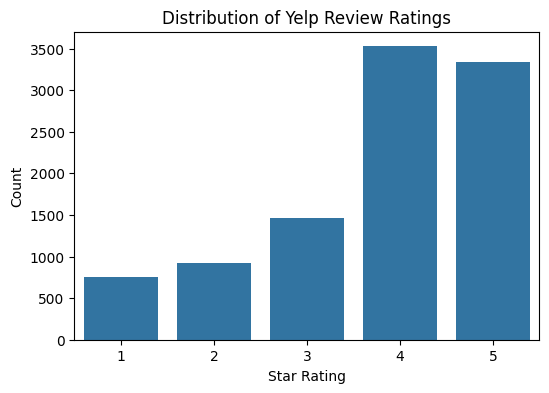

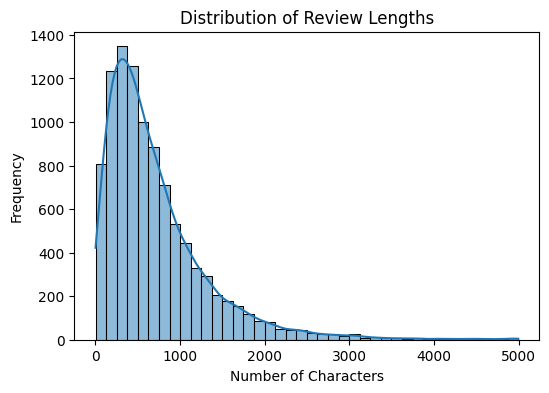

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset
df = pd.read_csv("C://Users//VIPATI//Downloads//archive\yelp.csv")

# 2️⃣ Basic structure
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample rows:")
print(df.head(3))

# 3️⃣ Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 4️⃣ Quick descriptive stats
print("\nRating distribution:")
print(df['stars'].value_counts(normalize=True).round(3) * 100)

# 5️⃣ Review length stats
df['text_len'] = df['text'].astype(str).apply(len)
print("\nAverage review length:", df['text_len'].mean())
print("Median review length:", df['text_len'].median())

# 6️⃣ Visualization - Ratings Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='stars', data=df, order=sorted(df['stars'].unique()))
plt.title("Distribution of Yelp Review Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

# 7️⃣ Visualization - Review Length Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['text_len'], bins=40, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [9]:
df['stars'].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [3]:
import re
import string
from tqdm import tqdm
tqdm.pandas()

# Define text cleaning function
def clean_text(text):
    """
    Clean review text:
    - Lowercase
    - Remove URLs, HTML tags, emojis, special characters
    - Normalize whitespace
    """
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # URLs
    text = re.sub(r'<.*?>', '', text)  # HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)  # Remove emojis/symbols
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

# Apply cleaning
df['clean_text'] = df['text'].progress_apply(clean_text)

# Check sample
print(df[['text', 'clean_text']].head(3))


100%|██████████| 10000/10000 [00:00<00:00, 26992.93it/s]

                                                text  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
2  love the gyro plate. Rice is so good and I als...   

                                          clean_text  
0  my wife took me here on my birthday for breakf...  
1  i have no idea why some people give bad review...  
2  love the gyro plate. rice is so good and i als...  


In [4]:
# Check empty or very short texts
empty_texts = df[df['clean_text'].str.strip().eq('')]
print(f"Empty reviews after cleaning: {len(empty_texts)}")

# Review length after cleaning
df['clean_len'] = df['clean_text'].apply(len)
print(df['clean_len'].describe())


Empty reviews after cleaning: 0
count    10000.00000
mean       697.43680
std        605.11859
min          1.00000
25%        289.00000
50%        532.00000
75%        913.00000
max       4918.00000
Name: clean_len, dtype: float64


In [5]:
# Map star ratings to sentiment labels
def map_sentiment(stars):
    if stars <= 2:
        return 0  # negative
    elif stars == 3:
        return 1  # neutral
    else:
        return 2  # positive

df['sentiment_label'] = df['stars'].apply(map_sentiment)

print(df['sentiment_label'].value_counts())


sentiment_label
2    6863
0    1676
1    1461
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text'].tolist(),
    df['sentiment_label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_label']
)

print(f"Train size: {len(train_texts)}, Validation size: {len(val_texts)}")


Train size: 8000, Validation size: 2000


In [11]:
!pip install transformers torch --quiet
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize data
train_encodings = tokenizer(
    train_texts, truncation=True, padding=True, max_length=128
)
val_encodings = tokenizer(
    val_texts, truncation=True, padding=True, max_length=128
)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\VIPATI\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\VIPATI\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\VIPATI\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-t

In [13]:
import torch

class YelpDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = YelpDataset(train_encodings, train_labels)
val_dataset = YelpDataset(val_encodings, val_labels)


In [19]:
import transformers
print(transformers.__version__)


4.53.2


In [21]:
!pip install -U transformers


   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   --------------------- ------------------ 6.6/12.0 MB 33.2 MB/s eta 0:00:01
   ---------------------------------------  11.8/12.0 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 22.3 MB/s  0:00:00
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   ---------------------------------------- 566.1/566.1 kB 5.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 20.1 MB/s  0:00:00

  Attempting uninstall: huggingface-hub

    Found existing installation: huggingface-hub 0.33.4

    Uninstalling huggingface-hub-0.33.4:

   ---------------------------------------- 0/3 [huggingface-hub]
      Successfully uninstalled huggingface-hub-0.33.4
   ---------------------------------------- 0/3 [huggingface-hub]
   ---------------------------------------- 0/3 [huggingface-hub]
   ----------

  You can safely remove it manually.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install --upgrade "transformers[torch]"


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Load pretrained BERT model for sequence classification (3 labels)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    prec = precision_score(labels, preds, average='weighted')
    rec = recall_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1, 'precision': prec, 'recall': rec}

# Define training parameters
training_args = TrainingArguments(
    output_dir='C://Users//VIPATI//OneDrive - Circle K Europe//Desktop//sentiment',
    eval_strategy='epoch',     # evaluate after each epoch
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    logging_dir='./logs',
    logging_steps=200,
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Fine-tune BERT
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`